# Phase 1 Project: 

* Student name: Caroline Surratt
* Student pace: Self-Paced
* Scheduled project review date/time: Thursday, August 3rd at 2:30PM
* Instructor name: Morgan Jones


# Business Understanding

The company that this analysis was conducted for is interested in utilizing airplanes for commercial and private enterprises. However, they do not have experience in this industry and are unfamiliar with the potential risks. 

Due to the nature of aircraft operation, risk cannot be entirely avoided. However, this project analyzes how to best minimize risk by maximizing passenger safety. _Passenger safety should be of utmost importance in the business's decision , as a fatal accident could have a catastrophic effect on the company's reputation and finances._


Specifically, this analysis will recommend:

* makes and models of airplanes that have the lowest percentages of injuries (broken down by injury category)

* weather conditions to avoid flying in (due to higher percentages of fatal and serious injuries)

* additional training for pilots in specific phases of flight (due to higher numbers of injuries in those phases)

# Data Understanding

The dataset utilized for this analysis contains information about more than 90,000 civil aviation accidents in the United States from 1948-2022. It was obtained from the National Transportation Safety Board.

Because this dataset only contains information about aviation accidents (not all flights), it is not suitable for analyzing how to avoid airplane accidents entirely. However, this dataset will be useful in analyzing how to best maximize passenger safety by minimizing injuries. Further information about the specfic characteristics and features analyzed will be included throughout the analysis below.

Entries include: 

* when the accident occurred (event date)
* where the accident occurred (city/state, country, latitude, longitude, airport code, and airport name)
* information about the plane (make, model, aircraft type, number of engines, and engine type)
* information about the passengers (number fatally injured, seriously injured, minorly injured, and uninjured)
* information about the circumstances of the accident (weather condition, phase of flight, and purpose of flight)

Additional features that are less relevant to this analysis (for example, publication date) will be discussed in further detail later in the notebook.

# Importing Data and Packages

I will begin by importing the packages necessary to conduct the analysis.

In [1]:
#imported Pandas, NumPy, MatPlotLib, and set MatPlotLib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#turned off chained assignment warning, as I was receiving false positive warnings
pd.options.mode.chained_assignment = None

Now, I will import the data, which is stored in the data folder of this repository with the title "Aviation_Data.csv".

In [2]:
#imported the data from the .csv file and specified dtype for columns with mixed dtypes
df = pd.read_csv("data/Aviation_Data.csv", \
                 dtype={'Latitude': object, 'Longitude': object, 'Broad.phase.of.flight': object})
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Data Preparation

Before the data is used for analysis, it needs to be cleaned of missing, incomplete, and/or irrelevant data.

## Removing Incomplete and/or Irrelevant Data

I will begin by inspecting the dataset for missing values (NaNs). This output will also provide a list of all columns in the dataset.

In [3]:
#checked for the number of missing values per column
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

Some of the columns in this dataset are missing a significant proportion of their entries. Not only is some of the data incomplete, some of this information is  outside the scope of my business recommendation. Therefore, several columns will be dropped from the dataset. A further explanation for each of the columns is included below.

* In addition to there not being location information (**Location, Country, Latitude, Longitude, Airport Code, and Airport Name**) for many of the entries in this dataset, these features will be dependent on where the business conducts their commercial and private enterprises. Location is outside the scope of this recommendation.


* While the **Accident Number** and **Registration Number** are included for most entries in the dataset, they are not factors to consider with relationship to risk or safety. Additionally, they are not needed as identifiers, as each entry has a unique Event ID. 


* The **FAR Description** provides information about whether certain regulations are applied to the flight (for example, agricultural regulations or regulations for foreign flights). The regulations that the business is subject to will be determined federally (not by the business) and therefore analysis of this feature is unneccesary.


* Because the **Schedule** column contains information for less than 14% of the entries in this dataset, it does not make sense to include this feature. Additionally, I would have to make an assumption about the abbreviations used in this column (although it would be reasonable to assume that "SCHD" stands for "scheduled", "NSCH" stands for "not scheduled", and "UNK" stands for unknown). These three abbreviations do occur at roughly the same frequency in the entries, but the sample size is far too small to extrapolate this finding.


* The **Air Carrier** column also contains information for less than 20% of the entries in this dataset, and even the entries that do exist do not appear to be standardized: this information was entered as the name of the airline, the name of an individual, and even a generic title, such as "Pilot", "Private", or "Private Individual". I am not able to gain meaningful insight through the entries in this column.


* The **Report Status** column could be of use if entries were standardized. Some values in this column do provide meaningful insight into the cause of the accident (for example, "The pilot's failure to maintain control during a go-around."). However, the majority of entries in this column are simply "Probable Cause". Because of the lack of information that this column provides, it will be dropped from the dataset.


* Finally, **Publication Date** will not be a factor to consider, as it is not a factor that contributes to risk. 

In [4]:
#dropped each column listed above
df.drop(['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 
         'Airport.Name', 'Accident.Number', 'Registration.Number', 'FAR.Description',
        'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date'],
        axis=1, inplace=True)

The same number of entries are missing the Event Id, Accident Number, and Event Date, so I will explore this further.

In [5]:
#found the subset of the dataframe for which the Event ID is missing and inspected whether other 
#values were missing from these entries
print(df[df['Event.Id'].isna()].isna().sum())
df[df['Event.Id'].isna()].head(20)

Event.Id                  1459
Investigation.Type           0
Event.Date                1459
Injury.Severity           1459
Aircraft.damage           1459
Aircraft.Category         1459
Make                      1459
Model                     1459
Amateur.Built             1459
Number.of.Engines         1459
Engine.Type               1459
Purpose.of.flight         1459
Total.Fatal.Injuries      1459
Total.Serious.Injuries    1459
Total.Minor.Injuries      1459
Total.Uninjured           1459
Weather.Condition         1459
Broad.phase.of.flight     1459
dtype: int64


,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64552,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64570,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64591,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64593,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64725,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Because these entries only tell us that there was an accident (but not the number of fatalities, the type of aircraft (including make/model), the weather, etc.), it does not make sense to include them in the analysis. I will drop them from the dataframe in the cell below.

In [6]:
#dropped all entries for which the Event ID was missing and reinspected the number of missing values for
#each column
df.dropna(subset=['Event.Id'], inplace=True)
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

Next, I will look at the Aircraft Category column, as the business is specifically interested in planes.

In [7]:
#inspected the values in the "Aircraft.Category" column
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

Because the business is only interested in airplanes, I will drop all of the entries that indicate they are other forms of aircraft. For now, I will leave in null values, but label these as "Unknown". Because "Airplane" is the clear mode, it would be expected that most of the entries that have missing values would also be classified as "Airplane". We may be able to infer whether they are airplanes later in the analysis using the "Make" and/or "Model" columns.

In [8]:
#filled missing values with "Unknown"
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('Unknown')

In [9]:
#included only entries for airplanes and unknown aircrafts (likely airplanes) in the dataframe
df = df[df['Aircraft.Category'].isin(['Airplane', 'Unknown'])]
df['Aircraft.Category'].value_counts()

Unknown     56616
Airplane    27617
Name: Aircraft.Category, dtype: int64

After removing the entries and columns that are not useful to this analysis, I will again inspect the data for missing values.

In [10]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Injury.Severity             933
Aircraft.damage            3018
Aircraft.Category             0
Make                         60
Model                        90
Amateur.Built               100
Number.of.Engines          5391
Engine.Type                5772
Purpose.of.flight          5494
Total.Fatal.Injuries      10855
Total.Serious.Injuries    12014
Total.Minor.Injuries      11479
Total.Uninjured            5732
Weather.Condition          3891
Broad.phase.of.flight     23478
dtype: int64

Although there is still some missing information in our dataset, I will proceed with the data preparation, as I have eliminated the columns that are not of importance to this analysis and the rows that do not contain enough information to be of value. The columns related to number of injuries will be further examined and cleaned below.

## Converting Remaining Data to Usable Data Types

In the cells below, I will convert the Event Date to a datetime object (instead of a string). I will also capitalize all strings and fill all entries missing string values with "UNKNOWN". This will allow for consistent analysis using the .value_counts() method.

In [11]:
#converted the dates to datetimes instead of objects
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [12]:
#found all columns with entries that are objects
columns_of_strings = [column for column in df.columns if df[column].dtype == object]

#filled missing values with "UNKNOWN"
df[columns_of_strings] = df[columns_of_strings].fillna('UNKNOWN')

#converted all strings to uppercase in order to get accurate data using the .value_counts() method
for column in columns_of_strings:
    df[column] = df[column].apply(str.upper)
    
df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,ACCIDENT,1948-10-24,FATAL(2),DESTROYED,UNKNOWN,STINSON,108-3,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,UNK,CRUISE
1,20001218X45447,ACCIDENT,1962-07-19,FATAL(4),DESTROYED,UNKNOWN,PIPER,PA24-180,NO,1.0,RECIPROCATING,PERSONAL,4.0,0.0,0.0,0.0,UNK,UNKNOWN
2,20061025X01555,ACCIDENT,1974-08-30,FATAL(3),DESTROYED,UNKNOWN,CESSNA,172M,NO,1.0,RECIPROCATING,PERSONAL,3.0,NaN,NaN,NaN,IMC,CRUISE
3,20001218X45448,ACCIDENT,1977-06-19,FATAL(2),DESTROYED,UNKNOWN,ROCKWELL,112,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE
4,20041105X01764,ACCIDENT,1979-08-02,FATAL(1),DESTROYED,UNKNOWN,CESSNA,501,NO,NaN,UNKNOWN,PERSONAL,1.0,2.0,NaN,0.0,VMC,APPROACH


I will also create a new column titled 'Make and Model' that includes both the make and the model for each entry. Some model names are repeated for planes of different makes (for example, the CESSNA 180 and the PIPER 180). Therefore, in order to get an accurate analysis by plane type, both the make and model must be considered.

In [13]:
#created new column with both make and model
df['Make and Model'] = (df['Make'].str.upper() + " " + df['Model'].str.upper())
df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make and Model
0,20001218X45444,ACCIDENT,1948-10-24,FATAL(2),DESTROYED,UNKNOWN,STINSON,108-3,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,UNK,CRUISE,STINSON 108-3
1,20001218X45447,ACCIDENT,1962-07-19,FATAL(4),DESTROYED,UNKNOWN,PIPER,PA24-180,NO,1.0,RECIPROCATING,PERSONAL,4.0,0.0,0.0,0.0,UNK,UNKNOWN,PIPER PA24-180
2,20061025X01555,ACCIDENT,1974-08-30,FATAL(3),DESTROYED,UNKNOWN,CESSNA,172M,NO,1.0,RECIPROCATING,PERSONAL,3.0,NaN,NaN,NaN,IMC,CRUISE,CESSNA 172M
3,20001218X45448,ACCIDENT,1977-06-19,FATAL(2),DESTROYED,UNKNOWN,ROCKWELL,112,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE,ROCKWELL 112
4,20041105X01764,ACCIDENT,1979-08-02,FATAL(1),DESTROYED,UNKNOWN,CESSNA,501,NO,NaN,UNKNOWN,PERSONAL,1.0,2.0,NaN,0.0,VMC,APPROACH,CESSNA 501


# Exploratory Data Analysis

Before conducting my analysis, I will explore the desriptive statistics of the entire dataset.

### Injury Categories

First, I will look at the average numbers for each of the injury categories, as these categories will be of interest in my analysis.

In [14]:
#found the total number of entries in the dataset
print(len(df))

#used the .describe() method to get summary statistics of the dataset
df.describe()

84233


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,78842.000000,73378.000000,72219.000000,72754.000000,78501.000000
mean,1.156845,0.655973,0.275163,0.359032,5.562553
std,0.442885,5.629542,1.574799,2.293049,28.676815
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


For the 84,233 remaining entries in our dataset, we have the following results:

* The medians for the injury columns are: 0 fatal injuries, 0 serious injuries, 0 minor injuries, and 1 person uninjured.

* The averages for these columns are: 0.7 fatal injuries, 0.3 serious injuries, 0.4 minor injuries, and 5.6 people uninjured. 

These statistics reveal that our dataset is skewed to the right. Most of the flights in the dataset are solo or very small flights, but there are also flights with hundreds of passengers.

**More importantly, these statistics reveal that most people are uninjured in plane accidents.** The analysis that follows will further explore factors that correlate with low numbers and percentages of passengers injured.

### Weather Condition

I will also look at the values that occur in the weather condition column and their frequency, as I will later consider the correlation between weather and percent of passengers injured.

In [15]:
#found all values in the weather condition column
df['Weather.Condition'].value_counts()

VMC        73425
IMC         5852
UNKNOWN     3891
UNK         1065
Name: Weather.Condition, dtype: int64

VMC stands for "visual meteorological conditions", and IMC stands for "instrument meteorological conditions". In weather classified as VMC, a pilot is able to use visual cues. In contrast, in weather classified as IMC, a pilot must rely on his or her instruments due to meteorological conditions.

Here, I am assuming that "UNK" is an abbreviation for unknown, so I will adjust the cells containing the "UNK" abbreviation.

In [16]:
#replaced "UNK" with "UNKNOWN"
df.loc[df['Weather.Condition'] == 'UNK', 'Weather.Condition'] = 'UNKNOWN'

Now, I will create a bar chart showing the relative frequencies of each weather condition.

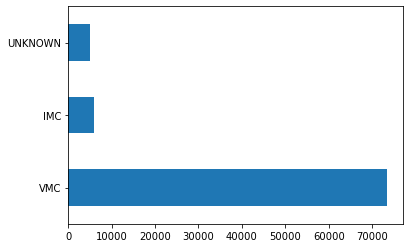

In [17]:
#created a bar chart showing relative frequencies
df['Weather.Condition'].value_counts().plot(kind='barh');

Significantly more accidents occurred during visual meteorological conditions compared to instrumental meteorological conditions. However, this does not inherently mean that VMC is more dangerous (again, we do not have data for all flights to know what proportion of all flights occur during VMC). In order to determine which weather condition is more dangerous to passengers, we will later examine injured/uninjured passengers by weather condition.

However, it is important to note that the proportion of flights occurring during VMC is much larger: because of this, we will need to compare injury categories using percentages rather than counts.

### Phase of Flight

Understanding which phase of flight accidents occured in will also be useful to our analysis. I will begin by inspecting the values that appear in this column and then creat a bar chart showing their relative frequencies.

In [18]:
#found all values in the phase of flight column
df['Broad.phase.of.flight'].value_counts()

UNKNOWN        24024
LANDING        15195
TAKEOFF        12352
CRUISE         10117
MANEUVERING     7896
APPROACH        6446
CLIMB           2018
TAXI            1942
DESCENT         1857
GO-AROUND       1350
STANDING         921
OTHER            115
Name: Broad.phase.of.flight, dtype: int64

For this analysis, "UNKNOWN" and "OTHER" are synonymous, as neither provide context about the phase of flight. Therefore, I will rename entires with "OTHER" as "UNKNOWN" before creating a bar chart.

In [19]:
#replaced "OTHER" with "UNKNOWN"
df.loc[df['Broad.phase.of.flight']=="OTHER", 'Broad.phase.of.flight'] = "UNKNOWN"

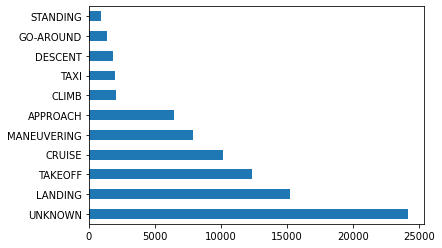

In [20]:
#created a bar chart showing the relative frequencies
df['Broad.phase.of.flight'].value_counts().plot(kind='barh');

"UNKNOWN" is the most commonly occurring value in this column, but accidents with this attribute will not be of use in our analysis. We may still be able to gain information about which phase of flight is most dangerous for passengers using the remaining phases later in the analysis.

# Data Analysis

Now that irrelevant data has been removed from the dataframe and we have some understanding of the values in this dataset, I will proceed with my analysis. I will begin by comparing injury percentages by plane type (make and model). Then, I will explore the relationship between weather and injuries and phase of flight and injuries.

## Comparing Injury Percentages by Plane Type

Breaking down the number of accidents by make and model alone is insufficient for analyzing the safety of these airplanes because this dataset _only includes information about flights that resulted in accidents/incidents._ For example, the Cessna 152 is the most commonly occuring airplane in this accident dataset. However, if these airplanes are also the most common type of airplane flown, then it would make sense that  they account for the highest number of civil aviation accidents, even if they are just as safe as other types of planes.

Although we do not have data to compare which planes are most likely and least likely to be in accidents, we **do** have data about whether or not passengers were injured in these accidents. Examining this feature will help to illuminate which airplanes are the safest for passengers even when an accident occurs.

### Data Cleaning

Before analyzing the injury categories by plane type, entries with missing, incomplete, or nonsensical values must be adjusted. I will begin by looking at the entries for which all information about the number of people injured and uninjured is missing.

In [21]:
#found the subset of the dataframe for which all values about fatalities and injuries were missing
subset = df[df['Total.Fatal.Injuries'].isna() & df['Total.Serious.Injuries'].isna() & \
   df['Total.Minor.Injuries'].isna() & df['Total.Uninjured'].isna()]
subset.index

Int64Index([15579, 18430, 19110, 19342, 20067, 20142, 20344, 20567, 21818,
            22177,
            ...
            62529, 62530, 62583, 62585, 63009, 63178, 63398, 63504, 63646,
            63761],
           dtype='int64', length=219)

There are 219 entries for which we have no information about the number of people killed, injured, or uninjured. Because we cannot gain any information about safety from these entries, they will be dropped from the dataset.

In [22]:
#dropped the subset from the dataframe
df.drop(subset.index, inplace=True)

Next, I will look at the entries where at least one (but not all) of the datapoints related to injuries is missing, as well as the most commonly occurring values for these columns.

In [23]:
#found the entries for which at/least one of the columns about injuries was missing
incomplete_entries = df[df['Total.Fatal.Injuries'].isna() | df['Total.Serious.Injuries'].isna() | \
                       df['Total.Minor.Injuries'].isna() | df['Total.Uninjured'].isna()] 
incomplete_entries.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make and Model
2,20061025X01555,ACCIDENT,1974-08-30,FATAL(3),DESTROYED,UNKNOWN,CESSNA,172M,NO,1.0,RECIPROCATING,PERSONAL,3.0,NaN,NaN,NaN,IMC,CRUISE,CESSNA 172M
4,20041105X01764,ACCIDENT,1979-08-02,FATAL(1),DESTROYED,UNKNOWN,CESSNA,501,NO,NaN,UNKNOWN,PERSONAL,1.0,2.0,NaN,0.0,VMC,APPROACH,CESSNA 501
5,20170710X52551,ACCIDENT,1979-09-17,NON-FATAL,SUBSTANTIAL,AIRPLANE,MCDONNELL DOUGLAS,DC9,NO,2.0,TURBO FAN,UNKNOWN,NaN,NaN,1.0,44.0,VMC,CLIMB,MCDONNELL DOUGLAS DC9
89,20020917X02486,ACCIDENT,1982-01-15,NON-FATAL,SUBSTANTIAL,UNKNOWN,CESSNA,310,NO,2.0,RECIPROCATING,PERSONAL,NaN,NaN,NaN,2.0,VMC,APPROACH,CESSNA 310
260,20020917X02495,ACCIDENT,1982-02-07,NON-FATAL,SUBSTANTIAL,AIRPLANE,BELLANCA,7KCAB,NO,1.0,RECIPROCATING,PERSONAL,NaN,NaN,NaN,2.0,VMC,LANDING,BELLANCA 7KCAB


In [24]:
#found the most common values for these columns
print(df['Total.Fatal.Injuries'].value_counts().head(3))
print(df['Total.Serious.Injuries'].value_counts().head(3))
print(df['Total.Minor.Injuries'].value_counts().head(3))
print(df['Total.Uninjured'].value_counts().head(3))

0.0    56576
1.0     8349
2.0     4933
Name: Total.Fatal.Injuries, dtype: int64
0.0    60104
1.0     8478
2.0     2592
Name: Total.Serious.Injuries, dtype: int64
0.0    58228
1.0     9602
2.0     3397
Name: Total.Minor.Injuries, dtype: int64
0.0    27871
1.0    23945
2.0    15177
Name: Total.Uninjured, dtype: int64


It appears that for most entries, missing data indicates a value of 0. For example, look at the entries with index 5, 89, and 280: the injury severity indicates that these accidents were non-fatal, but the number of total fatal entries was not recorded as a 0 - it is missing. 

Additionally, 0 is the most common value for each of these four categories (fatalities, serious injuries, minor injuries, and uninjured). Therefore, it makes sense to fill these missing values with a value of 0.

However, I first want to inspect whether there are any entries that have **both** a missing value(s) **and** a value(s) of 0. 

In [25]:
#found the subset of the entries that were missing data and also contained a value of 0
incomplete_entries[(incomplete_entries['Total.Fatal.Injuries'] == 0) | \
                  (incomplete_entries['Total.Serious.Injuries'] == 0) | \
                  (incomplete_entries['Total.Minor.Injuries'] == 0) | \
                  (incomplete_entries['Total.Uninjured'] == 0)]

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make and Model
4,20041105X01764,ACCIDENT,1979-08-02,FATAL(1),DESTROYED,UNKNOWN,CESSNA,501,NO,NaN,UNKNOWN,PERSONAL,1.0,2.0,NaN,0.0,VMC,APPROACH,CESSNA 501
7338,20001214X38508,ACCIDENT,1984-01-30,FATAL(2),DESTROYED,UNKNOWN,CESSNA,P210N,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,2.0,NaN,IMC,APPROACH,CESSNA P210N
18229,20001213X31373,ACCIDENT,1987-07-26,NON-FATAL,SUBSTANTIAL,UNKNOWN,PIPER,PA-18-150,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,1.0,NaN,VMC,LANDING,PIPER PA-18-150
44807,20001211X11037,ACCIDENT,1998-09-02,FATAL(229),DESTROYED,UNKNOWN,DOUGLAS,MD-11,NO,NaN,UNKNOWN,UNKNOWN,229.0,0.0,0.0,NaN,UNKNOWN,UNKNOWN,DOUGLAS MD-11
49565,20001212X22212,ACCIDENT,2000-10-18,NON-FATAL,SUBSTANTIAL,UNKNOWN,PIPER,PA-28-161,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,2.0,NaN,VMC,TAXI,PIPER PA-28-161
49654,20001212X22327,ACCIDENT,2000-11-02,NON-FATAL,DESTROYED,UNKNOWN,CESSNA,172N,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,1.0,NaN,VMC,TAKEOFF,CESSNA 172N
49757,20001212X22293,ACCIDENT,2000-11-28,FATAL(2),SUBSTANTIAL,UNKNOWN,LANDES/KARICH/SCHMIDT,CHRISTEN EAGLE II,YES,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,NaN,VMC,MANEUVERING,LANDES/KARICH/SCHMIDT CHRISTEN EAGLE II
50072,20010209X00424,ACCIDENT,2001-02-08,NON-FATAL,SUBSTANTIAL,UNKNOWN,CESSNA,210M,NO,1.0,RECIPROCATING,POSITIONING,0.0,0.0,1.0,NaN,VMC,APPROACH,CESSNA 210M
50309,20010412X00740,ACCIDENT,2001-04-02,FATAL(1),SUBSTANTIAL,UNKNOWN,JACQUES J. MISTROT,SKYBOLT,YES,1.0,RECIPROCATING,FLIGHT TEST,1.0,0.0,0.0,NaN,VMC,TAKEOFF,JACQUES J. MISTROT SKYBOLT
50581,20010530X01035,ACCIDENT,2001-05-18,FATAL(2),DESTROYED,UNKNOWN,BEECH,D45,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,NaN,VMC,MANEUVERING,BEECH D45


There are 18 entries for which there are a combination of 0s and missing values. My interpretation of these entries is as follows:
- For most entries, a missing value is still a placeholder for 0. For example, the entry at index 44807 is a well-known flight in which all 229 passengers aboard were killed. However, there is not a value in the column for the number uninjured. This value should be 0.


- There are some entries for which the missing value indicates a true lack of information. For example, the entries at indexes 58264 and 60591 each contain three missing values and a value of 0. If these missing values are filled with 0s, the data will be impossible to interpret, as there must be some non-zero number of people who were injured or uninjured. Therefore, there is not enough information to interpret these particular entries.

I will proceed with the following strategy:
- Fill all missing values in the Fatal Injuries, Serious Injuries, Minor Injuries, and Uninjured colums with 0s. 


- If an entry contains 0s for all four of these columns, it will be dropped from the dataset.


In [26]:
#filled all missing values with 0 (the mode for each of the columns)
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0, inplace=True)
df['Total.Minor.Injuries'].fillna(0, inplace=True)
df['Total.Uninjured'].fillna(0, inplace=True)

In [27]:
#found the entires for which all of the columns related to injury are 0
all_zero_entries = df.loc[(df['Total.Fatal.Injuries'] == 0) & \
                  (df['Total.Serious.Injuries'] == 0) & \
                  (df['Total.Minor.Injuries'] == 0) & \
                  (df['Total.Uninjured'] == 0)]

In [28]:
#dropped the all zero entries from the DataFrame
df.drop(all_zero_entries.index, inplace=True)

Now that there are no incomplete or nonsensical entries in the dataset, I am able to proceed with my analysis. 

It is also noteworthy that the process above resulted in the near-perfect cleaning of the dataset. All missing values have been removed aside from a small portion of entries that are missing a value for the Number of Engines.

In [29]:
#reinspected the dataframe for missing values
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Event.Date                   0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines         4516
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Make and Model               0
dtype: int64

### Analysis of Injuries by Plane Make and Model

First, I will create a column for the total number of passengers by summing the four columns related to injuries. This column will be necessary for computing the percentages of passengers injured and uninjured.

In [30]:
#found total numbeer of passengers by summing the number of injured/uninjured
df['Total.Number.Passengers'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + \
                                  df['Total.Minor.Injuries'] +  df['Total.Uninjured'])
df.head()

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make and Model,Total.Number.Passengers
0,20001218X45444,ACCIDENT,1948-10-24,FATAL(2),DESTROYED,UNKNOWN,STINSON,108-3,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,UNKNOWN,CRUISE,STINSON 108-3,2.0
1,20001218X45447,ACCIDENT,1962-07-19,FATAL(4),DESTROYED,UNKNOWN,PIPER,PA24-180,NO,1.0,RECIPROCATING,PERSONAL,4.0,0.0,0.0,0.0,UNKNOWN,UNKNOWN,PIPER PA24-180,4.0
2,20061025X01555,ACCIDENT,1974-08-30,FATAL(3),DESTROYED,UNKNOWN,CESSNA,172M,NO,1.0,RECIPROCATING,PERSONAL,3.0,0.0,0.0,0.0,IMC,CRUISE,CESSNA 172M,3.0
3,20001218X45448,ACCIDENT,1977-06-19,FATAL(2),DESTROYED,UNKNOWN,ROCKWELL,112,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE,ROCKWELL 112,2.0
4,20041105X01764,ACCIDENT,1979-08-02,FATAL(1),DESTROYED,UNKNOWN,CESSNA,501,NO,NaN,UNKNOWN,PERSONAL,1.0,2.0,0.0,0.0,VMC,APPROACH,CESSNA 501,3.0


Now, I will create a dataframe that groups the data by airplane make and model.

I will first create a dataframe with the total number of passengers (including the numbers for each injury category) for each airplane make and model using the groupby method and sum function. Using this groupby method will allow me to calculate the overall percentages of passengers injured/uninjured for each airplane type rather than for each individual flight.

In [31]:
#created a new dataframe with the total number of passengers for each make and model
number_passengers = df.groupby(['Make and Model'])['Total.Number.Passengers', 'Total.Fatal.Injuries',
                                                  'Total.Serious.Injuries', 'Total.Minor.Injuries',
                                                  'Total.Uninjured'].sum().reset_index()
number_passengers.head()

<ipython-input-31-97276abef878>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  number_passengers = df.groupby(['Make and Model'])['Total.Number.Passengers', 'Total.Fatal.Injuries',


,Make and Model,Total.Number.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,107.5 FLYING CORPORATION ONE DESIGN DR 107,1.0,1.0,0.0,0.0,0.0
1,177MF LLC PITTS MODEL 12,2.0,0.0,2.0,0.0,0.0
2,1977 COLFER-CHAN STEEN SKYBOLT,1.0,0.0,0.0,1.0,0.0
3,1ST FTR GP FOCKE-WULF 190,1.0,1.0,0.0,0.0,0.0
4,2000 MCCOY GENESIS,1.0,1.0,0.0,0.0,0.0


Now, I will create a dataframe that counts the total number of accidents by airplane make and model using the groupby method and the count function.

In [32]:
#created a new dataframe with the total number of accidents for each make and model
number_accidents = df.groupby('Make and Model')['Event.Id'].count().reset_index()
number_accidents.rename(columns={'Event.Id': 'Number.Accidents'}, inplace=True)
number_accidents.head()

,Make and Model,Number.Accidents
0,107.5 FLYING CORPORATION ONE DESIGN DR 107,1
1,177MF LLC PITTS MODEL 12,1
2,1977 COLFER-CHAN STEEN SKYBOLT,1
3,1ST FTR GP FOCKE-WULF 190,1
4,2000 MCCOY GENESIS,1


I will merge these two dataframes to create one dataframe that includes the total number of passengers (including the numbers broken down by injury category) and the total number of accidents by airplane make and model.

In [33]:
#merged the two dataframes and inspected the head
accidents_by_plane_type = number_passengers.merge(number_accidents)
accidents_by_plane_type.head()

,Make and Model,Total.Number.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.Accidents
0,107.5 FLYING CORPORATION ONE DESIGN DR 107,1.0,1.0,0.0,0.0,0.0,1
1,177MF LLC PITTS MODEL 12,2.0,0.0,2.0,0.0,0.0,1
2,1977 COLFER-CHAN STEEN SKYBOLT,1.0,0.0,0.0,1.0,0.0,1
3,1ST FTR GP FOCKE-WULF 190,1.0,1.0,0.0,0.0,0.0,1
4,2000 MCCOY GENESIS,1.0,1.0,0.0,0.0,0.0,1


In order to improve the strength of my recommendation, I only want to consider aircraft for which there is enough data. Some of the planes in this dataset have 100% of their passengers uninjured, but that percentage reflects 1 accident with 1 person. A plane that also has 100% of its passengers uninjured for 200 passengers over 10 flights would be more statistically significant.

Therefore, I will limit my analysis to the planes that have data for at least 50 passengers and at least 10 accidents.

In the cell below, I create a subset that only includes the plane make and models for which there is data for at least 50 passengers and at least 10 accidents.

In [34]:
#limited the subset to planes with data for 50+ passengers and 10+ accidents
accidents_subset = accidents_by_plane_type.loc[
                                               (accidents_by_plane_type['Total.Number.Passengers'] >= 50) & 
                                               (accidents_by_plane_type['Number.Accidents'] >= 10)
                                                ].reset_index(drop=True)

It will be useful to utilize percentages (rather than counts) for each of the injury categories in order to compare the airplanes. In the cell below, I will calculate a percentage for each injury category and add these to the dataframe as columns.

In [35]:
#found the percent for each injured/uninjured category
accidents_subset['Percent.Fatal.Injuries'] = ((accidents_subset['Total.Fatal.Injuries'] / 
                                               accidents_subset['Total.Number.Passengers'])*100)
accidents_subset['Percent.Serious.Injuries'] = ((accidents_subset['Total.Serious.Injuries'] / 
                                                 accidents_subset['Total.Number.Passengers'])*100)
accidents_subset['Percent.Minor.Injuries'] = ((accidents_subset['Total.Minor.Injuries'] / 
                                               accidents_subset['Total.Number.Passengers'])*100)
accidents_subset['Percent.Uninjured'] = ((accidents_subset['Total.Uninjured'] / 
                                          accidents_subset['Total.Number.Passengers'])*100)
accidents_subset.head()

,Make and Model,Total.Number.Passengers,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.Accidents,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
0,AERO COMMANDER 100,70.0,6.0,9.0,18.0,37.0,40,8.571429,12.857143,25.714286,52.857143
1,AERO COMMANDER 500,55.0,13.0,4.0,1.0,37.0,18,23.636364,7.272727,1.818182,67.272727
2,AERO COMMANDER 680FL,108.0,10.0,0.0,0.0,98.0,11,9.259259,0.000000,0.000000,90.740741
3,AERO COMMANDER 690A,52.0,22.0,4.0,1.0,25.0,16,42.307692,7.692308,1.923077,48.076923
4,AERO COMMANDER S2R,72.0,7.0,3.0,11.0,51.0,72,9.722222,4.166667,15.277778,70.833333


Now that the dataframe has percentages for each injury category, I will drop the injury count columns to improve readability. I will also sort the dataframe by the uninjured column and reset the index so that the planes with the highest percentages of passengers uninjured will be easily accessible.

Additionally, in order to utilize this subset in the vizualization dashboard, I will export the 10 planes with the highest percentages of passengers uninjured as a csv file.

In [36]:
#dropped columns with totals to improve readability (percentages will be used to compare)
accidents_subset.drop(['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
                      'Total.Uninjured'], axis=1, inplace=True)

#sorted the subset and reset the index so the highest percent of passengers uninjured can be easily accessed
accidents_subset.sort_values('Percent.Uninjured', inplace=True)
accidents_subset.reset_index(inplace=True, drop=True)

#saved the 10 planes with the highest uninjury percentages as "Top 10 Planes"
top_10_planes = accidents_subset.tail(10)
top_10_planes.reset_index(drop=True, inplace=True)
top_10_planes.to_csv('data/Top_10_Planes.csv')

#printed the tail to inspect visually
accidents_subset.tail(20)

,Make and Model,Total.Number.Passengers,Number.Accidents,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
526,BOEING 747-422,3822.0,12,0.000000,0.235479,1.125065,98.639456
527,SAAB-SCANIA AB (SAAB) 340A,224.0,10,0.446429,0.892857,0.000000,98.660714
528,BOEING 757-232,3695.0,24,0.000000,0.405954,0.893099,98.700947
529,BOEING 737-322,1436.0,12,0.000000,0.139276,1.114206,98.746518
530,MCDONNELL DOUGLAS MD-88,2166.0,21,0.092336,0.323176,0.646353,98.938135
531,EMBRAER EMB145,492.0,12,0.000000,0.609756,0.203252,99.186992
532,BOEING 757-251,1589.0,11,0.000000,0.188798,0.566394,99.244808
533,BOMBARDIER INC CL-600-2B19,684.0,16,0.000000,0.292398,0.438596,99.269006
534,MCDONNELL DOUGLAS MD-11F,292.0,11,0.000000,0.000000,0.684932,99.315068
535,BOEING 767-332,1755.0,10,0.000000,0.284900,0.398860,99.316239


The portion of the dataframe above provides valuable insight about the planes with the highest percentages of passengers uninjured. It is also clear that there is sufficient data for each of these planes (in fact, all of the planes in this subset include significantly more passengers than the initial constraint used).

In the cell below, I will create a bar chart of the percents by injury category for the 10 planes with the highest percent of passengers uninjured. 

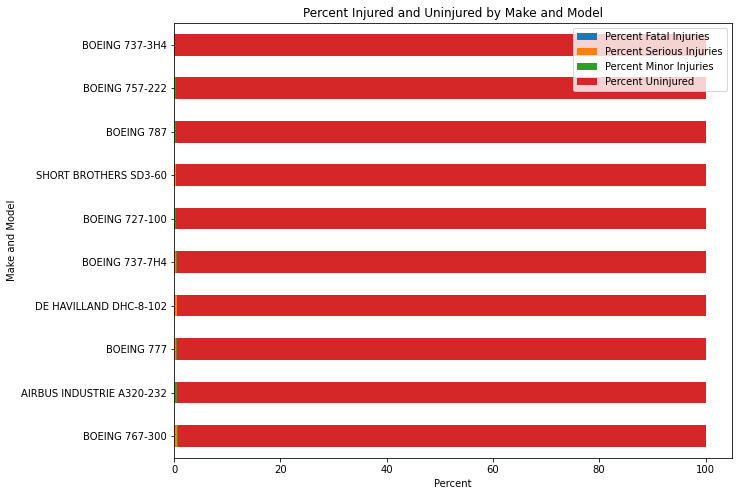

In [37]:
#created a subset to plot that only contains the 10 highest percentages of passengers uninjured and 
#dropped the columns irrelevant to the chart (total number of passengers and number of accidents)
accidents_subset_plot = accidents_subset[-10:].drop(['Total.Number.Passengers', 'Number.Accidents'], axis=1)

#renamed the columns to improve readability in the chart's legend
accidents_subset_plot.rename(columns={'Percent.Fatal.Injuries': 'Percent Fatal Injuries', 
                                      'Percent.Serious.Injuries': 'Percent Serious Injuries',
                                     'Percent.Minor.Injuries': 'Percent Minor Injuries',
                                     'Percent.Uninjured': 'Percent Uninjured'}, inplace=True)

#set the index to 'Make and Model'
accidents_subset_plot.set_index('Make and Model', inplace=True)

#created the stacked bar chart, including title and labels
accidents_subset_plot.plot.barh(stacked=True, figsize=(10,8))
plt.title('Percent Injured and Uninjured by Make and Model')
plt.xlabel('Percent')
plt.ylabel('Make and Model');

This graph illustrates just how similar these 10 airplanes are: they all have an uninjury rate of nearly 100%. At first glance, it may even appear that the entire bar is red (which represents the percent of passengers uninjured). However, there are very small bars on the left side of the graph that represent the small proportion of passengers who were injured.

In order to better visualize the differences in safety for these 10 planes, I will drop the percentage of passengers uninjured from the subset. This will allow for better comparison of the proportion of passengers who were injured accross airplane types.

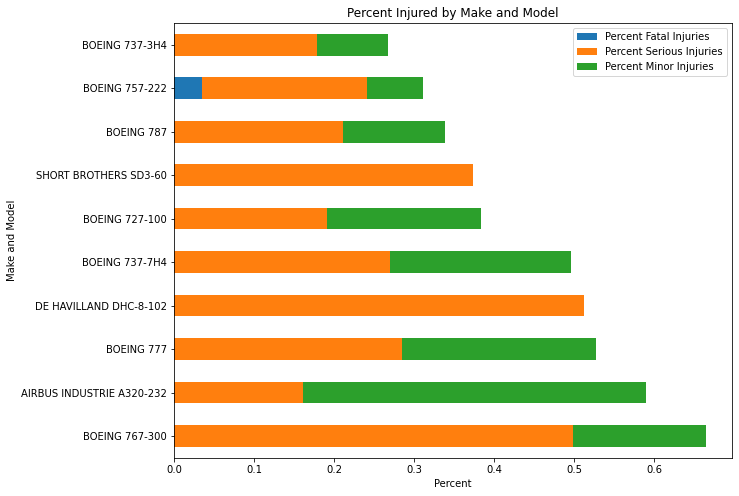

In [38]:
#dropped the percent uninjured column from the subset
accidents_subset_plot.drop('Percent Uninjured', axis=1, inplace=True)

#recreated the stacked bar chart, including title and labels
accidents_subset_plot.plot.barh(stacked=True, figsize=(10,8))
plt.title("Percent Injured by Make and Model")
plt.ylabel("Make and Model")
plt.xlabel("Percent");

As the graph above illustrates, the airplane with the smallest percentage of passengers in any injury category is the **Boeing 737-3H4**, with 99.73% of passengers uninjured. In addition to having the lowest percent of passengers injured, this airplane also has no recorded fatal injuries. There is one plane in this subset that has a smaller percentage of serious injuries (the Airbus Industrie A320-232). However, it is only a fraction of a percent lower, and it has a much larger percent of minor injuries, resulting in a larger percentage of passengers injured overall.

Therefore, **I recommend that the business utilize Boeing 737-3H4 airplanes for their enterprises, as these planes have the lowest percentage of passengers injured in accidents.**

If the utlization of the Boeing 737-3H4 is not possible, I recommend another plane in this subset of 10, with the exclusion of the Boeing 757-222, as this plane does have a recorded fatality.

## Comparing Injury Rates by Other Factors

In addition to considering the type of airplane used, the business should also consider other factors that can have an impact on the safety of a flight. Below, I will analyze weather and phase of flight and explore the effects that these two variables have on flight safety.

### Comparing Injury Percentages by Weather

I will begin by recalling the values found in the weather condition column of the dataframe.

In [39]:
#found all values in weather condition column
df['Weather.Condition'].value_counts()

VMC        73310
IMC         5838
UNKNOWN     3854
Name: Weather.Condition, dtype: int64

Again, VMC stands for "visual meteorological conditions", and IMC stands for "instrument meteorological conditions". In weather classified as VMC, a pilot is able to use visual cues. In contrast, in weather classified as IMC, a pilot must rely on his or her instruments due to meteorological conditions.

In order to compare the injury percentages by weather condition, I will create a new dataframe that groups the entries by this feature and includes the totals for each of the injury categories.

In [40]:
#created a dataframe that includes the injury categories by weather condition
injuries_by_weather = df.groupby('Weather.Condition')['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                                                     'Total.Minor.Injuries', 'Total.Uninjured', 
                                                      'Total.Number.Passengers'].sum().reset_index()
injuries_by_weather

<ipython-input-40-c70e9a05c918>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  injuries_by_weather = df.groupby('Weather.Condition')['Total.Fatal.Injuries', 'Total.Serious.Injuries',


,Weather.Condition,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Number.Passengers
0,IMC,11588.0,2120.0,2700.0,39627.0,56035.0
1,UNKNOWN,12051.0,1630.0,1587.0,98188.0,113456.0
2,VMC,24495.0,16122.0,21834.0,298851.0,361302.0


As discussed previously, these counts are difficult to compare, since many more flights occurred in VMC.

In order to facilitate the comparison across different weather conditions, I will calculate percentages for each of the injury categories (rather than using the total counts seen above).

In [41]:
#found the percent for each injured/uninjured category
injuries_by_weather['Percent.Fatal.Injuries'] = ((injuries_by_weather['Total.Fatal.Injuries'] / 
                                                    injuries_by_weather['Total.Number.Passengers'])*100)
injuries_by_weather['Percent.Serious.Injuries'] = ((injuries_by_weather['Total.Serious.Injuries'] / 
                                                    injuries_by_weather['Total.Number.Passengers'])*100)
injuries_by_weather['Percent.Minor.Injuries'] = ((injuries_by_weather['Total.Minor.Injuries'] / 
                                                      injuries_by_weather['Total.Number.Passengers'])*100)
injuries_by_weather['Percent.Uninjured'] = ((injuries_by_weather['Total.Uninjured'] / 
                                                 injuries_by_weather['Total.Number.Passengers'])*100)

#dropped the totals per category since percentages provide a clearer comparison
injuries_by_weather.drop(['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
                        'Total.Uninjured'], axis=1, inplace=True)
injuries_by_weather

,Weather.Condition,Total.Number.Passengers,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
0,IMC,56035.0,20.679932,3.783350,4.818417,70.718301
1,UNKNOWN,113456.0,10.621739,1.436680,1.398780,86.542801
2,VMC,361302.0,6.779647,4.462195,6.043144,82.715014


Because unknown weather conditions will not help to better understand the impact that weather has on flight safety, that row will be dropped from the dataset.

In [42]:
#dropped 'UNKNOWN' weather condition, since this will not aid in analysis
injuries_by_weather.drop(1, inplace=True)

In [43]:
injuries_by_weather

,Weather.Condition,Total.Number.Passengers,Percent.Fatal.Injuries,Percent.Serious.Injuries,Percent.Minor.Injuries,Percent.Uninjured
0,IMC,56035.0,20.679932,3.783350,4.818417,70.718301
2,VMC,361302.0,6.779647,4.462195,6.043144,82.715014


The dataframe itself indicates that the percent uninjured is higher during visual conditions than during instrumental conditions. However, in order to better illustrate these differences, I will create a bar chart using the dataframe above.

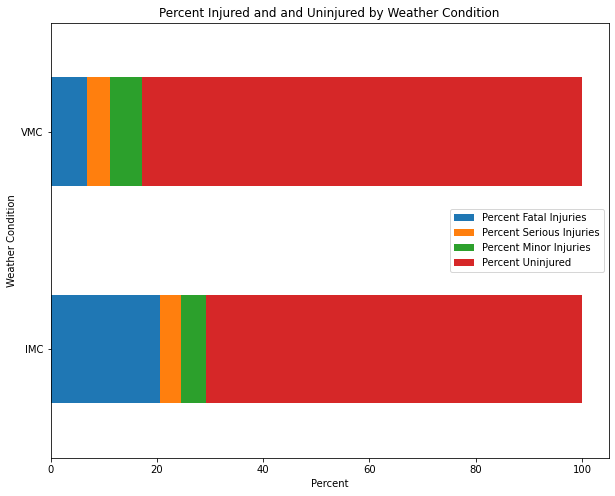

In [44]:
#dropped the total number of passengers since it is not needed for the bar chart
injuries_by_weather.drop(['Total.Number.Passengers'], axis=1, inplace=True)

#renamed the columns to improve readability in the legend
injuries_by_weather.rename(columns={'Percent.Fatal.Injuries': 'Percent Fatal Injuries', 
                                      'Percent.Serious.Injuries': 'Percent Serious Injuries',
                                     'Percent.Minor.Injuries': 'Percent Minor Injuries',
                                     'Percent.Uninjured': 'Percent Uninjured'}, inplace=True)

#set the index to weather condition
injuries_by_weather.set_index('Weather.Condition', inplace=True)

#created the bar chart, including a title and labels
injuries_by_weather.plot.barh(stacked=True, figsize=(10,8))
plt.title("Percent Injured and and Uninjured by Weather Condition")
plt.ylabel("Weather Condition")
plt.xlabel("Percent");

Two things are apparent from this bar chart:

* First, the percent of passengers fatally injured (represented in blue) is significantly larger in IMC than in VMC. Accidents are three times as fatal in IMC (20.7%) compared to VMC (6.8%)!


* Second, the percent of passengers uninjured (represented in red) is larger in VMC. In VMC, 82.7% of passengers were uninjured, compared to only 70.7% in IMC.


**Overall, in weather conditions that allow the pilot to rely on visual cues, fewer people are fatally injured and more poeple are entirely uninjured than in weather conditions that require the pilot to rely on instruments.**

Therefore, **I recommend that the business only fly in VMC.**

### Comparing Injury Rates by Phase of Flight

I will begin by reviewing the values found in the phase of flight column of the dataframe.

In [45]:
df['Broad.phase.of.flight'].value_counts()

UNKNOWN        22918
LANDING        15193
TAKEOFF        12352
CRUISE         10117
MANEUVERING     7896
APPROACH        6445
CLIMB           2017
TAXI            1942
DESCENT         1857
GO-AROUND       1350
STANDING         915
Name: Broad.phase.of.flight, dtype: int64

In order to compare the injuries by phase of flight, I will create a new dataframe that groups the entries by this feature and includes the totals for each of the injury categories.

As was done for the weather analysis above, I will drop the entries with an unknown phase of flight, as these entries will not provide any insight for the analysis.

In [46]:
#created a dataframe including the injury categories by phase of flight
phase = df.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                                                     'Total.Minor.Injuries', 'Total.Uninjured', 
                                                      'Total.Number.Passengers'].sum().reset_index()

#set the index to the 'Broad.phase.of.flight' column
phase.set_index('Broad.phase.of.flight', inplace=True)

#dropped the 'UNKNOWN' category
phase.drop('UNKNOWN', inplace=True)

<ipython-input-46-266d3031879e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  phase = df.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries', 'Total.Serious.Injuries',


In [47]:
phase

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Number.Passengers
Broad.phase.of.flight,,,,,
APPROACH,3825.0,1889.0,2480.0,21422.0,29616.0
CLIMB,1760.0,592.0,956.0,19484.0,22792.0
CRUISE,6100.0,2147.0,4483.0,45553.0,58283.0
DESCENT,909.0,464.0,984.0,18919.0,21276.0
GO-AROUND,587.0,387.0,622.0,2041.0,3637.0
LANDING,511.0,1181.0,3151.0,48151.0,52994.0
MANEUVERING,5241.0,1853.0,1893.0,5193.0,14180.0
STANDING,158.0,237.0,386.0,18556.0,19337.0
TAKEOFF,4291.0,3115.0,4913.0,44915.0,57234.0


In the two features analyzed previously (plane type and weather condition), the business will have a degree of autonomy in their risk avoidance (i.e. selecting a plane that has a low injury rate and electing to only fly that plane in clear weather). Therefore, using a percentage to compare was appropriate: the lowest injury percentage indicates the least dangerous option for the business.

However, the phase of flight is quite different, as there is not a degree of choice or autonomy: the business will not be able to avoid maneuvering the plane because it has the highest fatality rate. Additionally, accidents do not occur at the same frequency for each category. For example, the go-around category has the second-highest fatality rate. However, it only accounts for 587 fatalities, while the cruise category accounts for over 6000 categories - over 10 times as many! If the business were to devote resources to provide additional to training their pilots in a certain category of flight, it should be the category that accounts for the most fatalities and injuries. Therefore, for this portion of the analysis, counts will be used instead of percentages.

In [48]:
#sorted values to improve vizualization of values
phase.sort_values('Total.Fatal.Injuries', ascending=True, inplace=True)

#dropped the total number of passengers
phase.drop('Total.Number.Passengers', axis=1, inplace=True)

#renamed columns to improve readability in the legend
phase.rename(columns={'Total.Fatal.Injuries': 'Total Fatal Injuries', 
                    'Total.Serious.Injuries': 'Total Serious Injuries',
                    'Total.Minor.Injuries': 'Total Minor Injuries',
                     'Total.Uninjured': 'Total Uninjured'}, inplace=True)

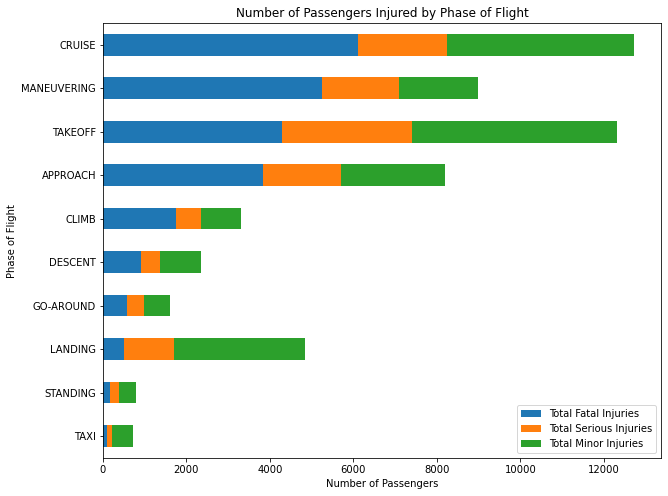

In [49]:
#created the bar chart, including the title and labels
phase.drop('Total Uninjured', axis=1).plot.barh(stacked=True, figsize=(10,8))
plt.title("Number of Passengers Injured by Phase of Flight")
plt.ylabel("Phase of Flight")
plt.xlabel("Number of Passengers");

As the chart above illustrates, the most dangerous accidents for passengers occur during the cruise, maneuvering, and takeoff phases of flight. 

In the cell below, I will find the percentage of fatalities that occurred during the cruise, maneuvering, and takeoff phases.

In [50]:
#found the total number of fatalities that occurred during 'CRUISE' and 'MANEUVERING'
cruise_maneuvering_takeoff_fatalities = (phase.loc[phase.index == 'CRUISE', 'Total Fatal Injuries'][0] + \
                                         phase.loc[phase.index == 'MANEUVERING', 'Total Fatal Injuries'][0] +\
                                         phase.loc[phase.index == 'TAKEOFF', 'Total Fatal Injuries'][0])

#found the total number of fatalities that occurred during phases
other_fatalities = phase['Total Fatal Injuries'].sum()

#divided to find the percent
percent_cruise_maneuvering_takeoff = (cruise_maneuvering_takeoff_fatalities / other_fatalities) * 100
print('Percent fatalities from cruise, maneuvering, and takeoff phases: ', percent_cruise_maneuvering_takeoff, "%")

Percent fatalities from cruise, maneuvering, and takeoff phases:  66.56446942599217 %


Nearly two-thirds of all fatalities occurred during the cruise, maneuvering, and takeoff phases of flight!

Therefore, my third and final recommendation to the business is to **provide pilots with additional training in the three phases of flight with the highest number of fatalities: the cruise, maneuvering, and takeoff phases.**

# Exporting Data for use in Tableau

I will use the cleaned dataset in order to create interactive vizualizations of the data. In order to do this, the cleaned dataset must be exported to a CSV file. 

In the cell below, I will save the file to a CSV titled 'Aviation_Data_Cleaned.csv' within the 'data' folder of this repository.

In [51]:
df.to_csv('data/Aviation_Data_Cleaned.csv')

# Conclusion

Risk is inherent to aircraft operation, and there is no "perfect airplane" that will eliminate the potential dangers. However, in order to minimize risks, the company should prioritize passenger safety over all else. 

In order to prioritize passenger safety, the business should:

* **Operate Boeing 737-3H4 airplanes.** These airplanes have the lowest percentage of passengers injured.  _If operation of these airplanes is not possible (for example, due to number of passengers or cargo load), the business should operate an airplane from the provided subset of 10 planes with the lowest injury percentages._


* **Fly only in weather conducive to Visible Meteorological Conditions.** Accidents in VMC are significantly less dangerous than accidents in IMC.


* **Provide pilots with additional training in the phases of flight that are most dangerous to passengers: cruise, maneuvering, and takeoff.** Nearly two-thirds of all fatal accidents occur during these phases.